<a href="https://colab.research.google.com/github/AkshitSingh11/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Importing the dataset

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

# Data Analysis

In [3]:
# First 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
#dataset Information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142686 entries, 0 to 142685
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    142686 non-null  int64  
 1   V1      142686 non-null  float64
 2   V2      142686 non-null  float64
 3   V3      142686 non-null  float64
 4   V4      142686 non-null  float64
 5   V5      142686 non-null  float64
 6   V6      142686 non-null  float64
 7   V7      142685 non-null  float64
 8   V8      142685 non-null  float64
 9   V9      142685 non-null  float64
 10  V10     142685 non-null  float64
 11  V11     142685 non-null  float64
 12  V12     142685 non-null  float64
 13  V13     142685 non-null  float64
 14  V14     142685 non-null  float64
 15  V15     142685 non-null  float64
 16  V16     142685 non-null  float64
 17  V17     142685 non-null  float64
 18  V18     142685 non-null  float64
 19  V19     142685 non-null  float64
 20  V20     142685 non-null  float64
 21  V21     14

In [5]:
#Check for missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,1
V8,1
V9,1


## Distribution of legit transactions and fraudulent transactions


In [6]:
# 0 -----> Normal Transaction
# 1 -----> Fraudulent Transaction

credit_card_data['Class'].value_counts()

,count
Class,
0.0,142414
1.0,271


This dataset is highly unbalanced

## Separating the data for analysis

In [7]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [8]:
print(legit.shape)
print(fraud.shape)

(142414, 31)
(271, 31)


In [9]:
#Statistical measures of the data
legit.Amount.describe()

,Amount
count,142414.000000
mean,90.605582
std,246.362078
min,0.000000
25%,5.990000
50%,23.545000
75%,80.000000
max,19656.530000


In [10]:
fraud.Amount.describe()

,Amount
count,271.000000
mean,117.543579
std,245.192472
min,0.000000
25%,1.000000
50%,9.990000
75%,100.745000
max,1809.680000


In [11]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,52483.978661,-0.239861,0.014111,0.688369,0.128882,-0.275950,0.081053,-0.107123,0.062368,-0.084300,...,0.041924,-0.042274,-0.117665,-0.033033,0.011573,0.130669,0.021440,-0.000325,0.002035,90.605582
1.0,43502.468635,-5.511878,3.894277,-7.088329,4.502723,-3.930204,-1.484990,-5.898183,1.503003,-2.625883,...,0.265625,1.251063,-0.314579,-0.117331,-0.113649,0.210638,0.071343,0.505482,0.092758,117.543579


# Data Preprocessing

## Under-Sampling

### Building a sample dataset containing similar distribution of normal transactions and fraudulent transactions

In [12]:
legit_sample = legit.sample(n=492)

In [13]:
legit_sample.shape

(492, 31)

### Concatenating two dataframes

In [14]:
new_dataset = pd.concat([fraud, legit_sample], axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0


In [16]:
new_dataset.shape

(763, 31)

In [17]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,271


In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,52423.132114,-0.269692,0.043592,0.651433,0.101384,-0.293469,0.107361,-0.036483,0.094873,-0.077727,...,0.040221,-0.059296,-0.178365,-0.039747,0.020168,0.100248,0.066106,-0.007153,0.014437,99.986850
1.0,43502.468635,-5.511878,3.894277,-7.088329,4.502723,-3.930204,-1.484990,-5.898183,1.503003,-2.625883,...,0.265625,1.251063,-0.314579,-0.117331,-0.113649,0.210638,0.071343,0.505482,0.092758,117.543579


We can see after under-sampling, the difference in mean of features are preserved.

## Splitting the data into features and targets

In [19]:
X = new_dataset.iloc[:,:-1]
y = new_dataset.iloc[:,-1]

In [20]:
print(X)
print(y)

         Time        V1        V2        V3        V4        V5        V6  \
541       406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623       472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920     4462 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108     6986 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329     7519  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...       ...       ...       ...       ...       ...       ...       ...   
107258  70359 -0.991285 -1.081905  1.053514  0.512226 -1.483659  2.009167   
53866   46185 -0.842253  0.538919  1.938964 -0.632674  0.181515  0.514928   
99029   66926  1.318944 -0.006535 -0.181176 -0.499224  0.194872 -0.022218   
114319  73432  1.185719 -0.884394 -0.155752 -0.663857 -0.784724 -0.576173   
42043   40935  0.771294 -0.720607  0.793562  0.683532 -0.973707 -0.118712   

              V7        V8        V9  ...       V20       V21       V22  \


## Splitting the data into training and testing data

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify = y)

In [22]:
print(X.shape ,X_train.shape, X_test.shape)

(763, 30) (610, 30) (153, 30)


# Model Training

## Logistic Regression

In [23]:
model = LogisticRegression(max_iter=7500)

## Training the Logistic Regression Model with Training Data


In [24]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=7500)

## Random Forest Classifier

In [25]:
model2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [26]:
model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

# Model Evaluation

In [27]:
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

## Model Statistics for Logistic Regression

In [28]:
# On training data
X_train_prediction1 = model.predict(X_train)

In [29]:
model_stats(y_train, X_train_prediction1)

Accuracy:  0.9672131147540983
Precision:  0.9852216748768473
Recall:  0.9216589861751152


In [30]:
# On testing data
X_test_prediction1 = model.predict(X_test)

In [31]:
model_stats(y_test, X_test_prediction1)

Accuracy:  0.954248366013072
Precision:  0.9607843137254902
Recall:  0.9074074074074074


In [32]:
# AUC calculation
auc1 = metrics.roc_auc_score(y_test, X_test_prediction1)
print(auc1)

0.9436026936026937


## Model Statistics for Random Forest Classifier

In [33]:
# On training data
X_train_prediction2 = model2.predict(X_train)

In [34]:
model_stats(y_train, X_train_prediction2)

Accuracy:  0.9934426229508196
Precision:  1.0
Recall:  0.9815668202764977


In [35]:
# On testing data
X_test_prediction2 = model2.predict(X_test)

In [36]:
model_stats(y_test, X_test_prediction2)

Accuracy:  0.9607843137254902
Precision:  1.0
Recall:  0.8888888888888888


In [37]:
# AUC calculation
auc2 = metrics.roc_auc_score(y_test, X_test_prediction2)
print(auc2)

0.9444444444444444


# Visualization

## Confusion Matrix

## For Logistic Regression

Text(0.5, 427.9555555555555, 'Predicted')

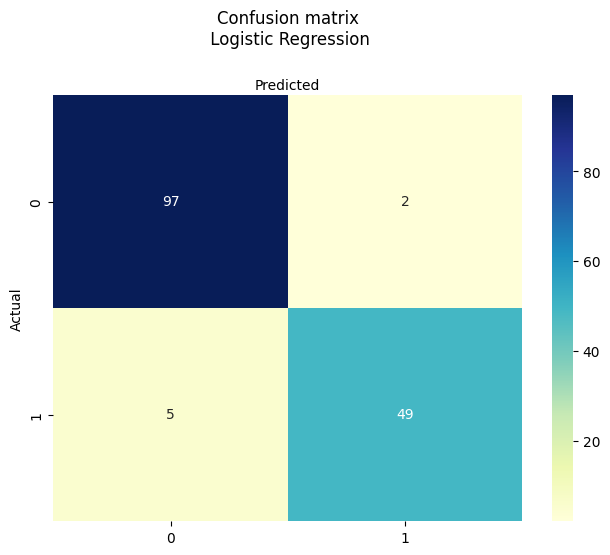

In [38]:
cnf_matrix = metrics.confusion_matrix(y_test, X_test_prediction1)

class_names = [0,1] # Our categories

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n Logistic Regression', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## For  Random Forest Classifier

Text(0.5, 427.9555555555555, 'Predicted')

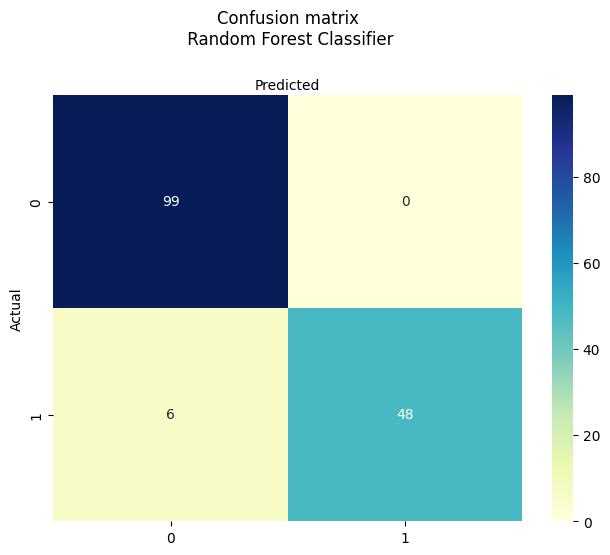

In [39]:
cnf_matrix = metrics.confusion_matrix(y_test, X_test_prediction2)

class_names = [0,1] # Our categories

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n Random Forest Classifier', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

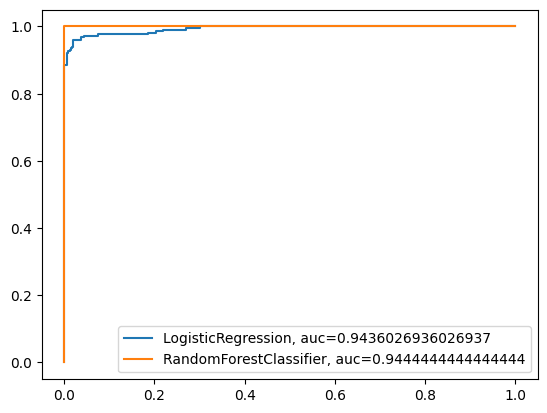

In [40]:
X_train_probability1 = model.predict_proba(X_train)[::,1]
X_train_probability2 = model2.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train, X_train_probability1)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc1))
fpr2, tpr2, _ = metrics.roc_curve(y_train, X_train_probability2)
plt.plot(fpr2,tpr2,label="RandomForestClassifier, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

# Conclusion

We can see that AUC of Random Forest Classifier is slightly higher than that of Logistic Regression. Also the accuracy, precision of the Random Forest Classifier Model is higher than that of Logistic Regression model. But recall of Random Forest Classifier is slightly less than that of Logistic Regression. Therefore our Random Forest Classifier model is predicting slighlty better credit card frauds than our Logistuc Regression model.